In [1]:
from DAboard import *
from data_aquire_control import *
import filecmp

import matplotlib.pyplot as plt
daq = DABoard()
new_ip = '192.168.1.170'

board_status = daq.connect(new_ip)


Calling Board_Defines class constructor
Host name is: 192.168.1.170
connected


In [7]:
DataAquire_write(daq, 1, 0)  # 使用假数据
DataAquire_write(daq, 2, 10)  # 禁止采集, fifo 清空
DataAquire_write(daq, 3, 1000)
DataAquire_write(daq, 4, 100)
DataAquire_write(daq, 5, 10000)
DataAquire_write(daq, 9, 600)  # oversample
DataAquire_write(daq, 6, 0)  # 禁止采集, fifo 清空
DataAquire_write(daq, 6, 1)  # 使能采集
DataAquire_write(daq, 0, 0x80000000)
print(DataAquire_read(daq, 0))
print(DataAquire_read(daq, 6))
print(DataAquire_read(daq, 4))
import time
print(time.time())
temp_data = ReadDataAquire_Data(daq, 0, 40000)
print(time.time())

1
900
166222
1559286736.522533
1559286736.6491985


In [8]:
# DataAquire_write(daq, 6, 0)  # 禁止采集, fifo 清空
DataAquire_read(daq, 6)

10004

In [9]:
# // reset
DataAquire_dac_write(daq, 0x280001)
# // power up
DataAquire_dac_write(daq, 0x200000)
DataAquire_dac_write(daq, 0x200003)
#   // enable internal reference
DataAquire_dac_write(daq, 0x380001)
# // set multiplier // B路2倍，A路2倍
DataAquire_dac_write(daq, 0x020000) 
# // update the caches
DataAquire_dac_write(daq, 0x300003)

In [10]:
# set channel A
DataAquire_dac_write(daq, 0x187FFF)
# set channel A
DataAquire_dac_write(daq, 0x197FFF)
# 更新两路寄存器命令，后16位只需时钟即可
DataAquire_dac_write(daq, 0x0F0000)

2.01288349737


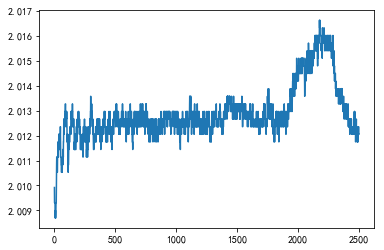

2.00290617227


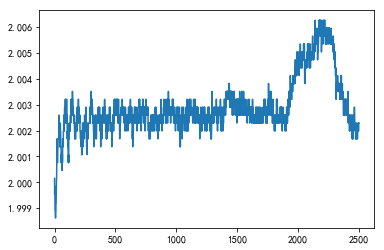

2.49979327077


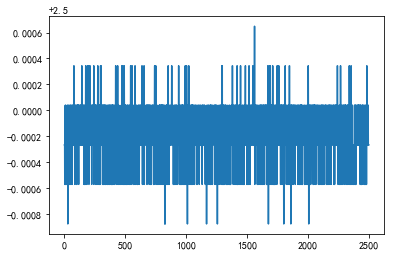

3.27577373922


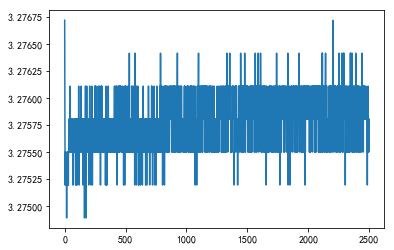

2.00668979934


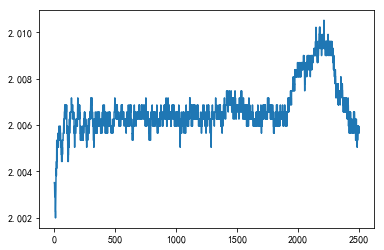

-0.0036754711223


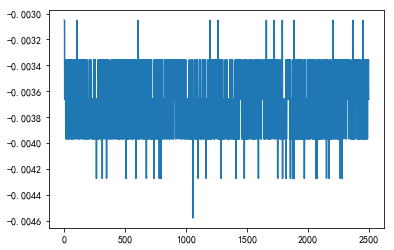

4.8316187686


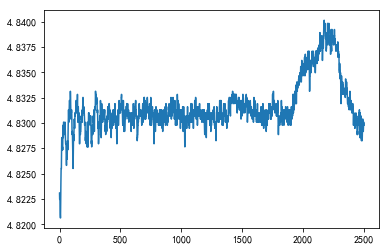

2.00774693031


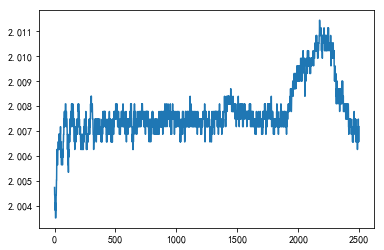

In [11]:
import numpy as np
fmt = '<' + 'h' * 20000
tt = struct.unpack(fmt, temp_data[0:40000])
import matplotlib.pyplot as plt
t1 = list(tt)
for idx in range(len(t1)):
    t1[idx] = t1[idx] * (20/65535.0)

for i in range(8):
    plt.figure(i)
    plt.plot(t1[i:-1:8])
    print(np.mean(t1[i:-1:8]))
    plt.show()

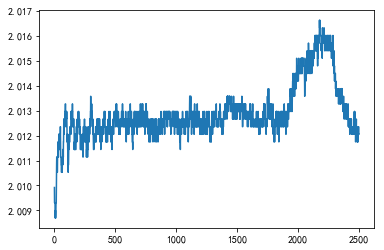

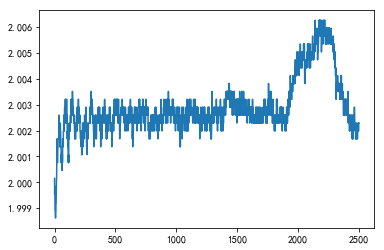

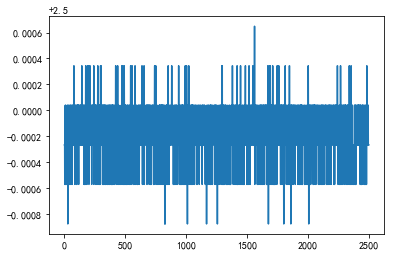

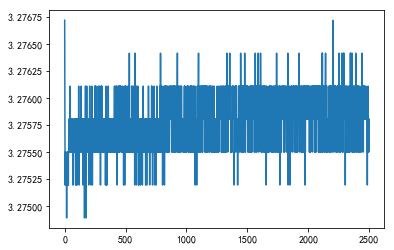

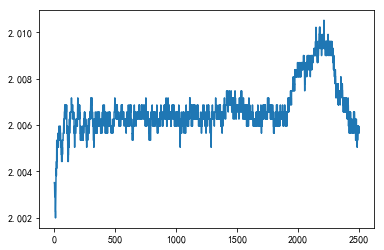

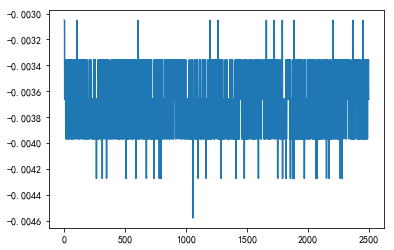

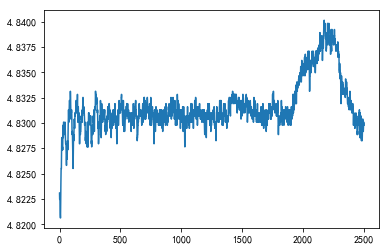

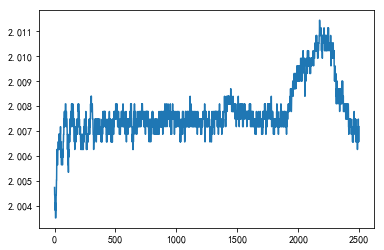

In [12]:
fmt = '<' + 'h' * 20000
tt = struct.unpack(fmt, temp_data[0:40000])
import matplotlib.pyplot as plt
t1 = list(tt)
for idx in range(len(t1)):
    t1[idx] = t1[idx] * (20/65535.0)

for i in range(8):
    plt.figure(i)
    plt.plot(t1[i:-1:8])
    plt.show()

In [61]:
t2 = tt[0:2048]+tt[4096:4096+2048]

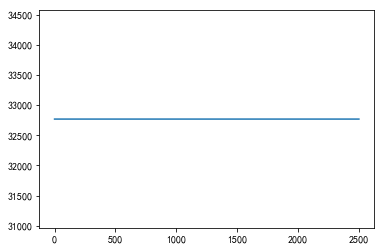

In [153]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(tt[6:-1:8])
plt.show()
# tt

In [108]:
da.disconnect()

Closing socket
